<a href="https://colab.research.google.com/github/Jotin-Hirom/Data-Science-with-Python-Lectures/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import test_data1.csv as ts

X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])

kMeans = KMeans(n_clusters=3, random_state=11)
kMeans.fit(X)

# KMeans(algorithm='auto',copy_x=True,init='k-means++',max_iter=300,n_clusters=3,n_init=10,n_jobs = None, precompute_distance = 'auto',random_state= 11, tol=0.0001, verbose=0)

print (kMeans.labels_[:])

[0 0 2 1 1 1]


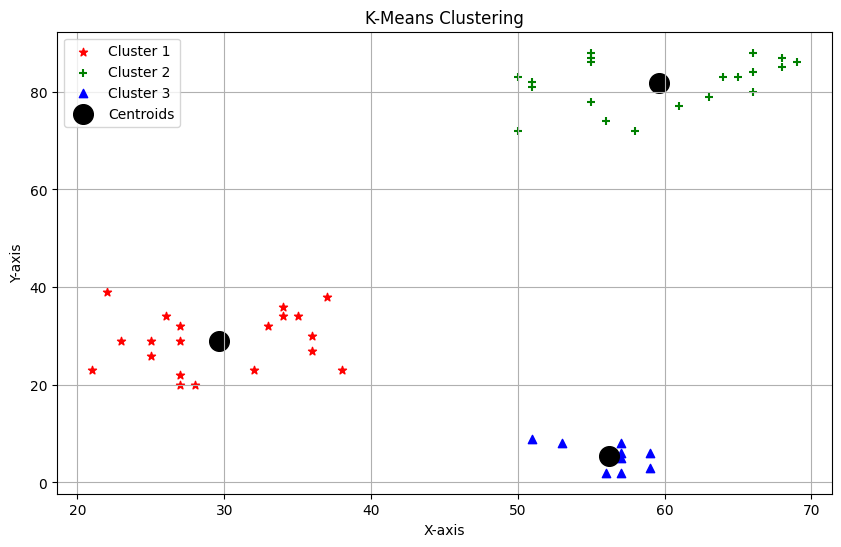

In [ ]:
import numpy as np
import xgboost as xgb
import random as rd
import csv
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt


with open(file="test_data1.csv",mode="w",newline='') as test_data:
    writer = csv.writer(test_data)
    for i in range(0,40,2):
        a = rd.randrange(20,40)
        b = rd.randrange(20,40)
        writer.writerow([a,b])


    for j in range(50,90,2):
        a = rd.randrange(50,70)
        b = rd.randrange(70,90)
        writer.writerow([a,b])

    for k in range(50,60,1):
        a = rd.randrange(50,60)
        b = rd.randrange(0,10)
        writer.writerow([a,b])



    # X = np.array([[1, 2], [1, 4], [1, 0],
                  # [10, 2], [10, 4], [10, 0]])
with open(file="test_data1.csv", mode="r", newline='') as test_data:  # changed to mode 'r' for reading the data
    kMeans = KMeans(n_clusters=3, random_state=11)
    # Load data from the CSV file into a pandas DataFrame
    data = pd.read_csv('/content/test_data1.csv', header=None)
    # print(data)
    # print()
    # print()
    # Convert the DataFrame to a NumPy array
    X = data.values
    kMeans.fit(X)

    # KMeans(algorithm='auto',copy_x=True,init='k-means++',max_iter=300,n_clusters=3,n_init=10,n_jobs = None, precompute_distance = 'auto',random_state= 11, tol=0.0001, verbose=0)

    # print (kMeans.labels_[:])
    labels = kMeans.labels_
    centres = kMeans.cluster_centers_

    markers = ['*', '+', '^']
    colors = ['red','green','blue']

    plt.figure(figsize=(10, 6))

    # print(X)
    for i in range(3):
      cluster_data = X[labels == i]
      plt.scatter(cluster_data[:, 0], cluster_data[:, 1], marker=markers[i], color=colors[i], label=f'Cluster {i+1}')
    plt.scatter(centres[:, 0], centres[:, 1], marker='o', color='black', s=200, label='Centroids')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('K-Means Clustering')
    plt.legend()
    plt.grid(True)
    plt.show()




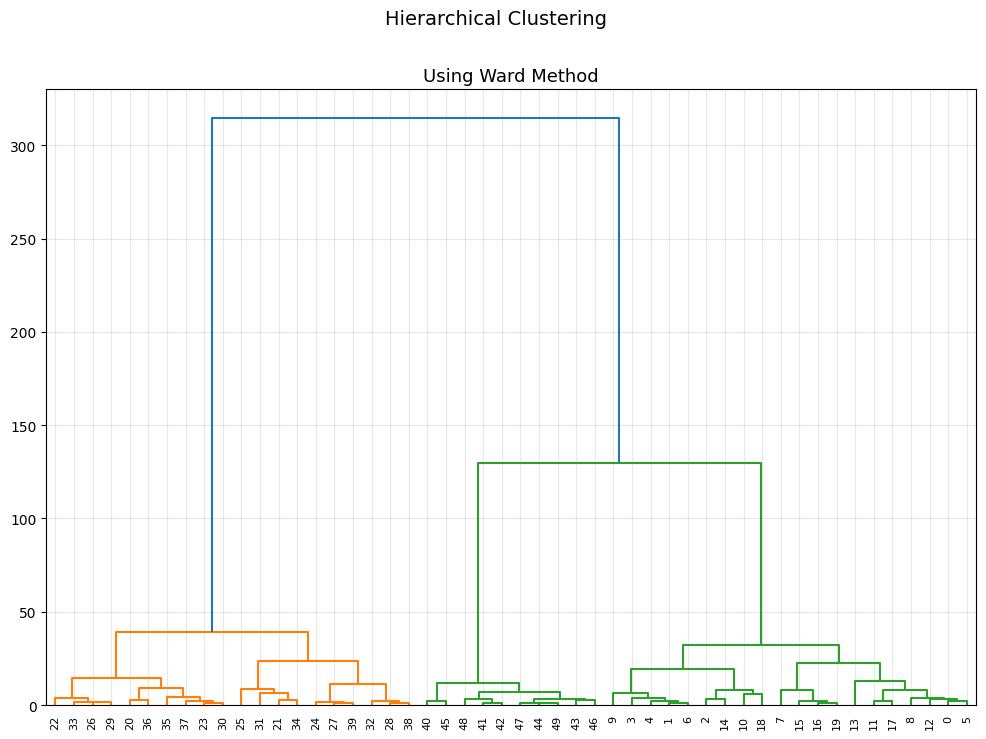

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
with open(file="test_data1.csv", mode="r", newline='') as test_data:  # changed to mode 'r' for reading the data
    # Load data from the CSV file into a pandas DataFrame
    data = pd.read_csv('/content/test_data1.csv', header=None)
    # Convert the DataFrame to a NumPy array
    X = data.values
    plt.figure(figsize=(12,8))
    linkage_data = linkage(X, method='ward', metric='euclidean')

    dendrogram(linkage_data)
    plt.suptitle("Hierarchical Clustering", fontsize=14)
    plt.title("Using Ward Method",fontsize=13)
    plt.grid(True, alpha=0.3)
    plt.show()

Cluster Assignments: [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2]


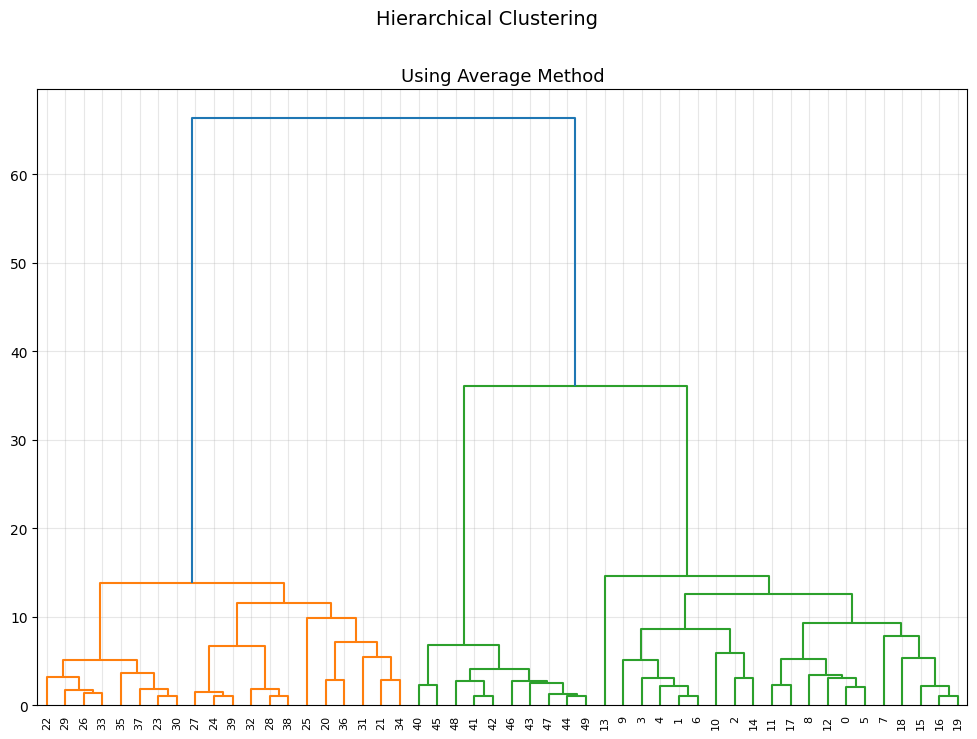

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage , fcluster
with open(file="test_data1.csv", mode="r", newline='') as test_data:  # changed to mode 'r' for reading the data
    # Load data from the CSV file into a pandas DataFrame
    data = pd.read_csv('/content/test_data1.csv', header=None)
    # Convert the DataFrame to a NumPy array
    X = data.values
    plt.figure(figsize=(12,8))
    linkage_data = linkage(X, method='average', metric='mean')

    dendrogram(
        linkage_data,
        # color_threshold=23,  # Same as `t` in fcluster (adjust as needed)
        # above_threshold_color='gray'  # Color for unclustered branches
               )
    plt.suptitle("Hierarchical Clustering", fontsize=14)
    plt.title("Using Average Method",fontsize=13)
    plt.grid(True, alpha=0.3)

    # Cut the dendrogram to get clusters (e.g., at a distance of 20)
    clusters = fcluster(linkage_data, t=20, criterion='distance')

    # Print the cluster assignments for each data point
    print("Cluster Assignments:", clusters)
    plt.show()

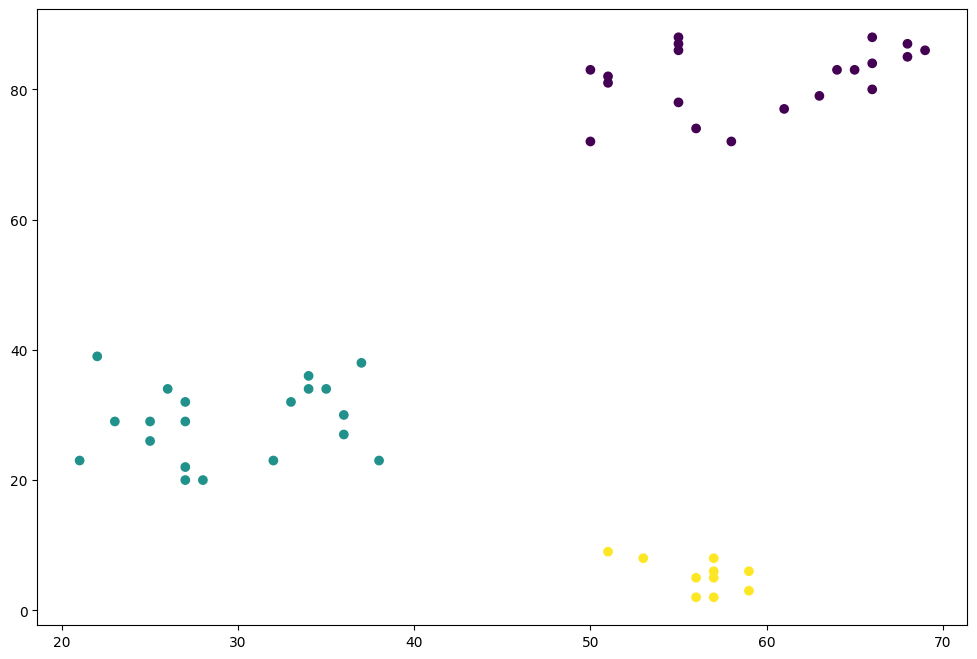

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage , fcluster
from sklearn.cluster import AgglomerativeClustering
with open(file="test_data1.csv", mode="r", newline='') as test_data:  # changed to mode 'r' for reading the data
    # Load data from the CSV file into a pandas DataFrame
    data = pd.read_csv('/content/test_data1.csv', header=None)
    # Convert the DataFrame to a NumPy array
    X = data.values
    plt.figure(figsize=(12,8))

    hierarchical_cluster = AgglomerativeClustering(n_clusters=3,  linkage='ward')

    labels = hierarchical_cluster.fit_predict(data)

    plt.scatter(X[:,0],X[:,1], c=labels)
    plt.show()